In [16]:
import numpy as np
import os

cwd = os.getcwd()
file_loc = cwd + '\input.txt'
data = np.genfromtxt(file_loc,dtype=str,delimiter='\n')#,comments=None)
# data = np.array(['FBFBBFFRLR','BFFFBBFRRR','FFFBBBFRRR','BBFFBBFRLL'])

In [17]:
row = []
column = [] 
for boarding_pass in data:
    tmp_row_data = boarding_pass[0:7]
    tmp_row_indx = np.arange(0,128)
    for fb in tmp_row_data:
        if fb == 'F':
            tmp_row_indx = np.split(tmp_row_indx,2)[0]
        else:
            tmp_row_indx = np.split(tmp_row_indx,2)[1]
    row.append(tmp_row_indx[0])

    tmp_col_data = boarding_pass[7:10]
    tmp_col_indx = np.arange(0,8)
    for rl in tmp_col_data:
        if rl == 'R': # upper half 
            tmp_col_indx = np.split(tmp_col_indx,2)[1]
        else:
            tmp_col_indx = np.split(tmp_col_indx,2)[0]
    column.append(tmp_col_indx[0])

In [50]:
seat_id = np.array(row)*8+np.array(column)
seat_id_array = np.zeros((128,8))

In [51]:
print(np.ndarray.max(seat_id))
#combines = np.column_stack((row,column))
plot = np.full((128,8),10)
for i in range(len(row)):
    plot[row[i],column[i]] = 0
    seat_id_array[row[i],column[i]] = seat_id[i]

885


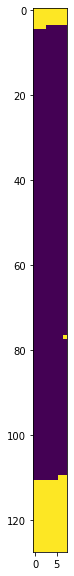

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.figure(figsize=(50,10))
plt.imshow(plot)
plt.show()

In [58]:
empty_seats = np.argwhere(plot == 10)
# empty_seats = [x for x in empty_seats if (plot[x][0]<100 and plot[x][0] >20]
for seat in empty_seats:
    if seat[0]<100 and seat[0] >20:
        print(seat, seat[0]*8+seat[1])
        print(seat[0]*8+seat[1]-1 in seat_id,seat[0]*8+seat[1]+1 in seat_id )

[77  7] 623
True True
